In [1]:
import copy
import pandas as pd

# Requests sends and recieves HTTP requests.
import requests

# Beautiful Soup parses HTML documents in python.
from bs4 import BeautifulSoup

import re

import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
%matplotlib inline

plt.style.use('ggplot')

In [2]:
recipe_url = 'https://www.epicurious.com/recipes/food/views/sausage-and-greens-sheet-pan-dinner'
r = requests.get(recipe_url)

In [3]:
r.status_code

200

In [4]:
r.content

b'<!doctype html>\n<html lang="en">\n    <head>\n        <meta charset="utf-8">\n        <meta name="apple-itunes-app" content="app-id=312101965" />\n        <title>Sausage and Greens Sheet-Pan Dinner recipe | Epicurious.com</title>\n        <link rel="dns-prefetch" href="//assets.adobedtm.com">\n        <link rel="dns-prefetch" href="https://www.google-analytics.com">\n        <link rel="dns-prefetch" href="//tpc.googlesyndication.com">\n        <link rel="dns-prefetch" href="//static.parsely.com">\n        <link rel="dns-prefetch" href="//condenast.demdex.net">\n        <link rel="dns-prefetch" href="//capture.condenastdigital.com">\n        <link rel="dns-prefetch" href="//pixel.condenastdigital.com">\n        <link rel="dns-prefetch" href="//use.typekit.net">\n        <link rel="dns-prefetch" href="//fonts.typekit.net">\n        <link rel="dns-prefetch" href="//p.typekit.net">\n        <link rel="dns-prefetch" href="//assets.epicurious.com">\n        <link rel="dns-prefetch" href="

In [5]:
soup = BeautifulSoup(r.content,'html.parser')
print(soup.prettify())

<!DOCTYPE doctype html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="app-id=312101965" name="apple-itunes-app">
   <title>
    Sausage and Greens Sheet-Pan Dinner recipe | Epicurious.com
   </title>
   <link href="//assets.adobedtm.com" rel="dns-prefetch"/>
   <link href="https://www.google-analytics.com" rel="dns-prefetch"/>
   <link href="//tpc.googlesyndication.com" rel="dns-prefetch"/>
   <link href="//static.parsely.com" rel="dns-prefetch"/>
   <link href="//condenast.demdex.net" rel="dns-prefetch"/>
   <link href="//capture.condenastdigital.com" rel="dns-prefetch"/>
   <link href="//pixel.condenastdigital.com" rel="dns-prefetch"/>
   <link href="//use.typekit.net" rel="dns-prefetch"/>
   <link href="//fonts.typekit.net" rel="dns-prefetch"/>
   <link href="//p.typekit.net" rel="dns-prefetch"/>
   <link href="//assets.epicurious.com" rel="dns-prefetch"/>
   <link href="//ad.doubleclick.net" rel="dns-prefetch"/>
   <link href="//pagead2.googlesyndication.com" 

In [6]:
soup.h1

<h1 itemprop="name">Sausage and Greens Sheet-Pan Dinner </h1>

In [7]:
soup.p

<p>reviews (<span class="reviews-count" itemprop="reviewCount">9</span>)</p>

In [8]:
soup.body.span

<span id="site-header-mount-point"><span class="site-header-wrap" data-react-checksum="566025640" data-reactid="1" data-reactroot=""><header class="site-header" data-reactid="2" role="banner"><div class="branding" data-reactid="3"><a aria-controls="main-navigation" class="show-main-navigation" data-reactid="4" href="#main-navigation" title="Go to Main Navigation">Go to Main Navigation</a><h2 class="epicurious-logo" data-reactid="5" itemscope="" itemtype="https://schema.org/Organization"><a data-reactid="6" data-track-location="header" data-track-source="navigation" href="/" itemprop="url" title="Epicurious">Epicurious</a></h2><aside class="social-channel-links" data-reactid="7"><h4 class="section-title" data-reactid="8">Follow Epicurious!</h4><ul data-reactid="9"><li class="facebook-social-channel-link" data-reactid="10"><a class="facebook-link" data-reactid="11" data-track-location="footer" data-track-source="navigation" href="https://www.facebook.com/epicurious" rel="me noopener nore

In [9]:
soup.title

<title>Sausage and Greens Sheet-Pan Dinner recipe | Epicurious.com</title>

In [10]:
nutrition_info = []
nutrition_info.append({'Title': soup.title.text.strip()})

In [11]:
review_container = soup.find("div", {"class": "user-interactions"})
reviews = review_container.find('span')

for i in reviews:
    newdict = {}
    newdict['Rating'] = i
nutrition_info.append(newdict)

In [12]:
review_container = soup.find("div", {"class": "review-rating"})
rows = review_container.find_all("span")



for row in rows:
    newdict = {}
    newdict['Reviews'] = row.text.strip()
nutrition_info.append(newdict)


In [13]:
div = soup.find("div", {"class": "nutrition content"})
list_ = div.find("ul")
rows = list_.find_all("li")

empty_row = {}
    

for row in rows:
    
    new_row = copy.copy(empty_row)
    columns = row.find_all("span")
    new_row[columns[0].text.strip()] = (columns[1].text.strip())
    nutrition_info.append(new_row)    

In [14]:
div = soup.find("div", {"class": "ingredients-info"})
list_ = div.find("ul")
rows = list_.find_all("li")

empty_row = {}
    
count=0
for row in rows:
    count+=1
    empty_row['Ingredient'+ ' #{}'.format(count)]= row.text.strip()
nutrition_info.append(empty_row)

In [15]:
nutrition_info

[{'Title': 'Sausage and Greens Sheet-Pan Dinner recipe | Epicurious.com'},
 {'Rating': '3.5/4'},
 {'Reviews': '9'},
 {'Calories': '665'},
 {'Carbohydrates': '8 g(3%)'},
 {'Fat': '63 g(96%)'},
 {'Protein': '17 g(34%)'},
 {'Saturated Fat': '17 g(83%)'},
 {'Sodium': '855 mg(36%)'},
 {'Polyunsaturated Fat': '7 g'},
 {'Fiber': '1 g(5%)'},
 {'Monounsaturated Fat': '36 g'},
 {'Cholesterol': '86 mg(29%)'},
 {'Ingredient #1': '1 1/2 lb. micro potatoes (about 1" in diameter) or new potatoes, cut into 1" pieces',
  'Ingredient #2': '1/2 cup extra-virgin olive oil, divided',
  'Ingredient #3': '1 3/4 tsp. kosher salt, divided',
  'Ingredient #4': '1/2 tsp. freshly ground black pepper, divided',
  'Ingredient #5': '1 lb. (about 4 links) uncooked sweet or spicy Italian sausage',
  'Ingredient #6': '3 Tbsp. sherry or red wine vinegar',
  'Ingredient #7': '1 1/2 tsp. Dijon mustard',
  'Ingredient #8': '1 1/2 tsp. honey',
  'Ingredient #9': '1 large bunch Tuscan kale or collard greens, stems removed, l

In [16]:
recipe_url = 'https://www.epicurious.com/recipes/food/views/diner-style-buttermilk-pancakes'
r = requests.get(recipe_url)

soup = BeautifulSoup(r.content,'html.parser')

#add title
nutrition_info = []
nutrition_info.append({'Title': soup.title.text.strip()})

review_container = soup.find("div", {"class": "user-interactions"})
reviews = review_container.find('span')

#add rating
for i in reviews:
    newdict = {}
    newdict['Rating'] = i
nutrition_info.append(newdict)

review_container = soup.find("div", {"class": "review-rating"})
rows = review_container.find_all("span")

#add review count
for row in rows:
    newdict = {}
    newdict['Reviews'] = row.text.strip()
nutrition_info.append(newdict)

#add nutrition
div = soup.find("div", {"class": "nutrition content"})
list_ = div.find("ul")
rows = list_.find_all("li")

empty_row = {}
    
for row in rows:
    new_row = copy.copy(empty_row)
    columns = row.find_all("span")
    new_row[columns[0].text.strip()] = (columns[1].text.strip())
    nutrition_info.append(new_row)  
    
#add ingredients
div = soup.find("div", {"class": "ingredients-info"})
list_ = div.find("ul")
rows = list_.find_all("li")

empty_row = {}
    
count=0
for row in rows:
    count+=1
    empty_row['Ingredient'+ ' #{}'.format(count)]= row.text.strip()
nutrition_info.append(empty_row)

nutrition_info

[{'Title': 'Diner-Style Buttermilk Pancakes recipe | Epicurious.com'},
 {'Rating': '4/4'},
 {'Reviews': '26'},
 {'Calories': '423'},
 {'Carbohydrates': '63 g(21%)'},
 {'Fat': '13 g(19%)'},
 {'Protein': '13 g(26%)'},
 {'Saturated Fat': '7 g(35%)'},
 {'Sodium': '755 mg(31%)'},
 {'Polyunsaturated Fat': '1 g'},
 {'Fiber': '2 g(7%)'},
 {'Monounsaturated Fat': '3 g'},
 {'Cholesterol': '120 mg(40%)'},
 {'Ingredient #1': '2 cups all-purpose flour',
  'Ingredient #2': '3 tablespoons sugar',
  'Ingredient #3': '1 1/4 teaspoons baking powder',
  'Ingredient #4': '1 1/4 teaspoons baking soda',
  'Ingredient #5': '1 1/4 teaspoons kosher salt',
  'Ingredient #6': '2 large eggs',
  'Ingredient #7': '1 3/4 cups buttermilk',
  'Ingredient #8': '1/2 cup cold seltzer water or club soda',
  'Ingredient #9': '1 teaspoon vanilla extract',
  'Ingredient #10': '3 tablespoons unsalted butter, melted, plus more',
  'Ingredient #11': 'Pure maple syrup (for serving)'}]

In [17]:
recipe_url = 'https://www.epicurious.com/recipes/food/views/summer-pizza-with-salami-zucchini-and-tomatoes'
r = requests.get(recipe_url)

soup = BeautifulSoup(r.content,'html.parser')

#add title
nutrition_info = []
nutrition_info.append({'Title': soup.title.text.strip()})

review_container = soup.find("div", {"class": "user-interactions"})
reviews = review_container.find('span')

#add rating
for i in reviews:
    newdict = {}
    newdict['Rating'] = i
nutrition_info.append(newdict)

review_container = soup.find("div", {"class": "review-rating"})
rows = review_container.find_all("span")

#add review count
for row in rows:
    newdict = {}
    newdict['Reviews'] = row.text.strip()
nutrition_info.append(newdict)

#add nutrition
div = soup.find("div", {"class": "nutrition content"})
list_ = div.find("ul")
rows = list_.find_all("li")

empty_row = {}
    
for row in rows:
    new_row = copy.copy(empty_row)
    columns = row.find_all("span")
    new_row[columns[0].text.strip()] = (columns[1].text.strip())
    nutrition_info.append(new_row)  
    
#add ingredients
div = soup.find("div", {"class": "ingredients-info"})
list_ = div.find("ul")
rows = list_.find_all("li")

empty_row = {}
    
count=0
for row in rows:
    count+=1
    empty_row['Ingredient'+ ' #{}'.format(count)]= row.text.strip()
nutrition_info.append(empty_row)

nutrition_info

[{'Title': 'Summer Pizza with Salami, Zucchini, and Tomatoes recipe | Epicurious.com'},
 {'Rating': '3.5/4'},
 {'Reviews': '7'},
 {'Calories': '541'},
 {'Carbohydrates': '73 g(24%)'},
 {'Fat': '20 g(30%)'},
 {'Protein': '18 g(36%)'},
 {'Saturated Fat': '5 g(25%)'},
 {'Sodium': '1077 mg(45%)'},
 {'Polyunsaturated Fat': '3 g'},
 {'Fiber': '7 g(27%)'},
 {'Monounsaturated Fat': '10 g'},
 {'Cholesterol': '17 mg(6%)'},
 {'Ingredient #1': '5 Tbsp. extra-virgin olive oil, divided',
  'Ingredient #2': '2 lb. store-bought pizza dough, room temperature',
  'Ingredient #3': '2 cups whole-milk fresh ricotta (about 1 lb.)',
  'Ingredient #4': '1 1/2 tsp. kosher salt, divided',
  'Ingredient #5': '1 tsp. freshly ground black pepper, divided',
  'Ingredient #6': '4 oz. thinly sliced soppressata',
  'Ingredient #7': '1 medium shallot, finely chopped',
  'Ingredient #8': '2 Tbsp. red wine vinegar',
  'Ingredient #9': '2 medium zucchini (about 1 lb. total), thinly shaved lengthwise on a mandoline or with

In [18]:
recipe_url = 'https://www.epicurious.com/recipes/food/views/shrimp-scampi-pasta-234258'
r = requests.get(recipe_url)

soup = BeautifulSoup(r.content,'html.parser')

#add title
nutrition_info = []
nutrition_info.append({'Title': soup.title.text.strip()})

review_container = soup.find("div", {"class": "user-interactions"})
reviews = review_container.find('span')

#add rating
for i in reviews:
    newdict = {}
    newdict['Rating'] = i
nutrition_info.append(newdict)

review_container = soup.find("div", {"class": "review-rating"})
rows = review_container.find_all("span")

#add review count
for row in rows:
    newdict = {}
    newdict['Reviews'] = row.text.strip()
nutrition_info.append(newdict)

#add nutrition
div = soup.find("div", {"class": "nutrition content"})
list_ = div.find("ul")
rows = list_.find_all("li")

empty_row = {}
    
for row in rows:
    new_row = copy.copy(empty_row)
    columns = row.find_all("span")
    new_row[columns[0].text.strip()] = (columns[1].text.strip())
    nutrition_info.append(new_row)  
    
#add ingredients
div = soup.find("div", {"class": "ingredients-info"})
list_ = div.find("ul")
rows = list_.find_all("li")

empty_row = {}
    
count=0
for row in rows:
    count+=1
    empty_row['Ingredient'+ ' #{}'.format(count)]= row.text.strip()
nutrition_info.append(empty_row)

nutrition_info

[{'Title': 'Shrimp Scampi Pasta recipe | Epicurious.com'},
 {'Rating': '3.5/4'},
 {'Reviews': '497'},
 {'Calories': '675'},
 {'Carbohydrates': '67 g(22%)'},
 {'Fat': '30 g(47%)'},
 {'Protein': '27 g(54%)'},
 {'Saturated Fat': '12 g(58%)'},
 {'Sodium': '655 mg(27%)'},
 {'Polyunsaturated Fat': '3 g'},
 {'Fiber': '3 g(13%)'},
 {'Monounsaturated Fat': '14 g'},
 {'Cholesterol': '181 mg(60%)'},
 {'Ingredient #1': '1/4 cup olive oil',
  'Ingredient #2': '1 lb peeled and deveined large shrimp (raw; 20 to 25 per lb)',
  'Ingredient #3': '4 large garlic cloves, left unpeeled and forced through a garlic press',
  'Ingredient #4': '1/2 teaspoon dried hot red-pepper flakes',
  'Ingredient #5': '1/2 cup dry white wine',
  'Ingredient #6': '1 teaspoon salt',
  'Ingredient #7': '1/2 teaspoon black pepper',
  'Ingredient #8': '5 tablespoons unsalted butter',
  'Ingredient #9': '3/4 lb capellini (angel-hair pasta)',
  'Ingredient #10': '1/2 cup chopped fresh flat-leaf parsley'}]

In [55]:
recipe_url = 'https://www.epicurious.com/recipes/food/views/double-chocolate-layer-cake-101275'
r = requests.get(recipe_url)

soup = BeautifulSoup(r.content,'html.parser')

#add title
nutrition_info = []
nutrition_info.append({'Title': soup.title.text.strip()})

review_container = soup.find("div", {"class": "user-interactions"})
reviews = review_container.find('span')

#add rating
for i in reviews:
    newdict = {}
    newdict['Rating'] = i
nutrition_info.append(newdict)

review_container = soup.find("div", {"class": "review-rating"})
rows = review_container.find_all("span")

#add review count
for row in rows:
    newdict = {}
    newdict['Reviews'] = row.text.strip()
nutrition_info.append(newdict)

#add nutrition
div = soup.find("div", {"class": "nutrition content"})
list_ = div.find("ul")
rows = list_.find_all("li")

empty_row = {}
    
for row in rows:
    new_row = copy.copy(empty_row)
    columns = row.find_all("span")
    new_row[columns[0].text.strip()] = (columns[1].text.strip())
    nutrition_info.append(new_row)  
    
#add tags
tag_container = soup.find("div", {"class": "menus-tags content"})
tag_list = tag_container.find("dl")
tags = {}

count = 0
for row in tag_list:
    count += 1
    tags['Tag' +' #{}'.format(count)] = row.text.strip()
nutrition_info.append(tags)
    
#add ingredients
div = soup.find("div", {"class": "ingredients-info"})
list_ = div.find("ul")
rows = list_.find_all("li")
empty_row = {}
    
count=0
for row in rows:
    count+=1
    empty_row['Ingredient'+ ' #{}'.format(count)]= row.text.strip()
nutrition_info.append(empty_row)

#dictionary for mongoDB
recipe_info_list = []
recipe_info = {}
for i in nutrition_info:
    for i,v in i.items():
        if i not in recipe_info.keys():
            recipe_info[i] = v
recipe_info_list.append(recipe_info)
recipe_info_list

[{'Title': 'Double Chocolate Layer Cake recipe | Epicurious.com',
  'Rating': '4/4',
  'Reviews': '1596',
  'Calories': '689',
  'Carbohydrates': '96 g(32%)',
  'Fat': '36 g(55%)',
  'Protein': '8 g(17%)',
  'Saturated Fat': '15 g(74%)',
  'Sodium': '488 mg(20%)',
  'Polyunsaturated Fat': '3 g',
  'Fiber': '6 g(25%)',
  'Monounsaturated Fat': '16 g',
  'Cholesterol': '73 mg(24%)',
  'Tag #1': 'Cake',
  'Tag #2': 'Mixer',
  'Tag #3': 'Chocolate',
  'Tag #4': 'Dessert',
  'Tag #5': 'Bake',
  'Tag #6': "Valentine's Day",
  'Tag #7': 'Kid-Friendly',
  'Tag #8': 'Spring',
  'Tag #9': 'Gourmet',
  'Tag #10': 'Vegetarian',
  'Tag #11': 'Pescatarian',
  'Tag #12': 'Peanut Free',
  'Tag #13': 'Tree Nut Free',
  'Tag #14': 'Soy Free',
  'Tag #15': 'Kosher',
  'Tag #16': 'Small Plates',
  'Ingredient #1': '3 ounces fine-quality semisweet chocolate such as Callebaut'}]

In [50]:
recipe_url = 'https://www.epicurious.com/recipes/food/views/turkey-meatloaf-107599'
r = requests.get(recipe_url)

soup = BeautifulSoup(r.content,'html.parser')

#add title
nutrition_info = []
nutrition_info.append({'Title': soup.title.text.strip()})


#add rating
review_container = soup.find("div", {"class": "user-interactions"})
reviews = review_container.find('span')

for i in reviews:
    newdict = {}
    newdict['Rating'] = i
nutrition_info.append(newdict)


#add review count
review_container = soup.find("div", {"class": "review-rating"})
rows = review_container.find_all("span")

for row in rows:
    newdict = {}
    newdict['Reviews'] = row.text.strip()
nutrition_info.append(newdict)

#add nutrition
for _ in range(1):
    try:
        div = soup.find("div", {"class": "nutrition content"})
        list_ = div.find("ul")
        rows = list_.find_all("li")

        empty_row = {}

        for row in rows:
            new_row = copy.copy(empty_row)
            columns = row.find_all("span")
            new_row[columns[0].text.strip()] = (columns[1].text.strip())
            nutrition_info.append(new_row)  
    except:
        pass
    
#add ingredients
div = soup.find("div", {"class": "ingredients-info"})
list_ = div.find("ul")
rows = list_.find_all("li")

empty_row = {}
    
count=0
for row in rows:
    count+=1
    empty_row['Ingredient'+ ' #{}'.format(count)]= row.text.strip()
nutrition_info.append(empty_row)

#dictionary for mongoDB
recipe_info_list = []
recipe_info = {}
for i in nutrition_info:
    for i,v in i.items():
        if i not in recipe_info.keys():
            recipe_info[i] = v
recipe_info_list.append(recipe_info)
recipe_info_list

[{'Title': 'Turkey Meatloaf recipe | Epicurious.com',
  'Rating': '3.5/4',
  'Reviews': '508',
  'Ingredient #1': '1 1/2 cups finely chopped onion',
  'Ingredient #2': '1 tablespoon minced garlic',
  'Ingredient #3': '1 teaspoon olive oil',
  'Ingredient #4': '1 medium carrot, cut into 1/8-inch dice',
  'Ingredient #5': '3/4 pound cremini mushrooms, trimmed and very finely chopped in a food processor',
  'Ingredient #6': '1 teaspoon salt',
  'Ingredient #7': '1/2 teaspoon black pepper',
  'Ingredient #8': '1 1/2 teaspoons Worcestershire sauce',
  'Ingredient #9': '1/3 cup finely chopped fresh parsley',
  'Ingredient #10': '1/4 cup plus 1 tablespoon ketchup',
  'Ingredient #11': '1 cup fine fresh bread crumbs (from 2 slices firm white sandwich bread)',
  'Ingredient #12': '1/3 cup 1% milk',
  'Ingredient #13': '1 whole large egg, lightly beaten',
  'Ingredient #14': '1 large egg white, lightly beaten',
  'Ingredient #15': '1 1/4 pound ground turkey (mix of dark and light meat)'}]

In [56]:
recipe_requests = [] 
soups = []

reviews = []
recipe_info_list =[]





for link in links:
    recipe_url = 'https://www.epicurious.com'+link
    recipe_requests.append(requests.get(recipe_url)) #grabs all links on page
    
    
for recipe_r in recipe_requests:
    soups.append(BeautifulSoup(recipe_r.content,'html.parser')) #parse all pages
    

for soup in soups:
    recipes=[]
    recipes.append({'Title': soup.title.text.strip()[:-17]}) #grab titles
    
    
    rating_container = soup.find("div", {"class": "user-interactions"}) #finding container for rating
    reviews.append(rating_container.find('span')) #find row for rating
    for r_container in reviews:
        newdict = {}
        newdict['Rating'] = r_container.text.strip() 
    recipes.append(newdict) #appending rating for each recipe
    
    
    #add review count
    review_container = soup.find("div", {"class": "review-rating"})
    rows = review_container.find_all("span")
    for row in rows:
        newdict = {}
        newdict['Reviews'] = row.text.strip()
    recipes.append(newdict) #appending review count for each recipe
    
    #add nutrition info
    for _ in range(1):
        try:
            div = soup.find("div", {"class": "nutrition content"})
            list_ = div.find("ul")
            rows = list_.find_all("li")
            empty_row = {}
            for row in rows:
                new_row = copy.copy(empty_row)
                columns = row.find_all("span")
                new_row[columns[0].text.strip()] = (columns[1].text.strip())
                recipes.append(new_row)  
        except:
            pass
    
    #add tags
    tag_container = soup.find("div", {"class": "menus-tags content"})
    tag_list = tag_container.find("dl")
    tags = {}

    count = 0
    for row in tag_list:
        count += 1
        tags['Tag' +' #{}'.format(count)] = row.text.strip()
    recipes.append(tags)
    
    
    
    #add ingredients
    div = soup.find("div", {"class": "ingredients-info"})
    list_ = div.find("ul")
    rows = list_.find_all("li")
    empty_row = {}

    count=0
    for row in rows:
        count+=1
        empty_row['Ingredient'+ ' #{}'.format(count)]= row.text.strip()
    recipes.append(empty_row)


    
    

    
    recipe_info = {}
    for i in recipes:
        for i,v in i.items():
            if i not in recipe_info.keys():
                recipe_info[i] = v
        

recipe_info_list.append(recipe_info)


In [81]:
recipe_info_list

[{'Title': 'Parmesan Chicken recipe',
  'Rating': '3.5/4',
  'Reviews': '407',
  'Tag #1': 'American',
  'Tag #2': 'Chicken',
  'Tag #3': 'Bake',
  'Tag #4': 'Kid-Friendly',
  'Tag #5': 'Quick & Easy',
  'Tag #6': 'Dinner',
  'Tag #7': 'Parmesan',
  'Tag #8': 'Healthy',
  'Tag #9': 'Gourmet',
  'Tag #10': 'Small Plates',
  'Ingredient #1': '3 tablespoons Dijon mustard',
  'Ingredient #2': '1 teaspoon white-wine vinegar',
  'Ingredient #3': '1/2 teaspoon salt',
  'Ingredient #4': '1/2 teaspoon black pepper',
  'Ingredient #5': '6 (5-oz) skinless boneless chicken breast halves',
  'Ingredient #6': '1 1/2 English muffins (not sandwich-size)',
  'Ingredient #7': '3/4 cup finely grated Parmigiano-Reggiano (1 1/2 oz)',
  'Ingredient #8': '1 tablespoon unsalted butter, melted',
  '_id': ObjectId('5d769a796195baeafe9d3dea')},
 {'Title': 'Winter Squash Soup with Gruyère Croutons recipe',
  'Rating': '3.5/4',
  'Reviews': '400',
  'Calories': '513',
  'Carbohydrates': '67 g(22%)',
  'Fat': '20 g

In [65]:
from pymongo import MongoClient
import pprint

In [66]:
# Connect to the hosted MongoDB instance
client = MongoClient('localhost', 27017)

In [73]:
db = client['test_database']

In [74]:
test = db['test_table']

In [84]:
test.insert_one(recipe_info_list[2])

In [182]:
recipes_table.find().count()

NameError: name 'recipes_table' is not defined

In [96]:
american = test.find({'Tag #1': 'American'})
for american in american:
    pprint.pprint(american)

{'Ingredient #1': '3 tablespoons Dijon mustard',
 'Ingredient #2': '1 teaspoon white-wine vinegar',
 'Ingredient #3': '1/2 teaspoon salt',
 'Ingredient #4': '1/2 teaspoon black pepper',
 'Ingredient #5': '6 (5-oz) skinless boneless chicken breast halves',
 'Ingredient #6': '1 1/2 English muffins (not sandwich-size)',
 'Ingredient #7': '3/4 cup finely grated Parmigiano-Reggiano (1 1/2 oz)',
 'Ingredient #8': '1 tablespoon unsalted butter, melted',
 'Rating': '3.5/4',
 'Reviews': '407',
 'Tag #1': 'American',
 'Tag #10': 'Small Plates',
 'Tag #2': 'Chicken',
 'Tag #3': 'Bake',
 'Tag #4': 'Kid-Friendly',
 'Tag #5': 'Quick & Easy',
 'Tag #6': 'Dinner',
 'Tag #7': 'Parmesan',
 'Tag #8': 'Healthy',
 'Tag #9': 'Gourmet',
 'Title': 'Parmesan Chicken recipe',
 '_id': ObjectId('5d769a796195baeafe9d3dea')}
{'Ingredient #1': '3 tablespoons Dijon mustard',
 'Ingredient #2': '1 teaspoon white-wine vinegar',
 'Ingredient #3': '1/2 teaspoon salt',
 'Ingredient #4': '1/2 teaspoon black pepper',
 'Ingre

In [78]:
pprint.pprint(test.find())


In [136]:
# for i in recipe_info_list[6:]:
#     test.insert_one(i)

# WORKING CODE

In [2]:
import copy
import pandas as pd

# Requests sends and recieves HTTP requests.
import requests

# Beautiful Soup parses HTML documents in python.
from bs4 import BeautifulSoup

In [3]:
from pymongo import MongoClient
client = MongoClient('localhost', 27017)

# Access/Initiate Database
recipe_db = client.recipe_database

# Access/Initiate Table
recipes_table = recipe_db.recipe_table


In [180]:
#final code

search_page_count = 2
for _ in range(2,4):
    search_url = 'https://www.epicurious.com/search/?sort=mostReviewed&page={}'.format(count)
    searchrequests = requests.get(search_url)
    searchsoup = BeautifulSoup(searchrequests.content,'html.parser')

    #grab links for recipes
    review_container = searchsoup.find("div", {"class": "results-group"})
    article = review_container.find("article")

    recipe_links=[]
    for row in review_container:
        columns = row.find_all("h4")
        for i in columns:
            for n in i:
                recipe_links.append(n['href'])
                
    #grab recipe features
    recipe_info_list =[]

    recipe_requests = [] 
    for link in recipe_links:
        recipe_url = 'https://www.epicurious.com'+link
        recipe_requests.append(requests.get(recipe_url)) 
        #grabs all links on page and puts into recipe requests list

    soups = []    
    for recipe_r in recipe_requests:
        soups.append(BeautifulSoup(recipe_r.content,'html.parser')) 
        #parses all pages and adds into soups list

    reviews = []
    for soup in soups:
        recipes=[]

        rating_container = soup.find("div", {"class": "user-interactions"}) #finding container for rating
        reviews.append(rating_container.find('span')) #find row for rating
        for r_container in reviews:
            ratingdict = {}
            ratingdict['Rating'] = r_container.text.strip() 


        #add review count
        review_container = soup.find("div", {"class": "review-rating"})
        rows = review_container.find_all("span")
        for row in rows:
            reviewsdict = {}
            reviewsdict['Reviews'] = row.text.strip()

        #add nutrition info
        nutrition_facts = []
        for _ in range(1):
            try:
                div = soup.find("div", {"class": "nutrition content"})
                list_ = div.find("ul")
                rows = list_.find_all("li")
                empty_row = {}
                for row in rows:
                    new_row = copy.copy(empty_row)
                    columns = row.find_all("span")
                    new_row[columns[0].text.strip()] = (columns[1].text.strip())
                    nutrition_facts.append(new_row)
            except:
                pass

        #add tags
        tag_tags=[]
        for _ in range(1):
            try:
                tag_container = soup.find("div", {"class": "menus-tags content"})
                tag_list = tag_container.find("dl")
                tags = {}

                count = 0
                for row in tag_list:
                    count += 1
                    tags['Tag' +' #{}'.format(count)] = row.text.strip()
                    tag_tags.append(tags)
            except:
                pass

        #add ingredients
        div = soup.find("div", {"class": "ingredients-info"})
        list_ = div.find("ul")
        rows = list_.find_all("li")
        ingredients_row = {}

        count = 0
        for row in rows:
            count += 1
            ingredients_row['Ingredient'+ ' #{}'.format(count)]= row.text.strip()


        recipes.append({'Title': soup.title.text.strip()[:-17]}) #grab title and puts it into recipes list

        recipes.append(ratingdict) #appending rating for each recipe

        recipes.append(reviewsdict) #appending review count for each recipe

        for i in nutrition_facts: #appending nutritional facts
            recipes.append(i)

        recipes.append(tag_tags)

        recipes.append(ingredients_row) 

        recipe_info = {}
        for i in recipes:
            for i,v in i.items():
                if i not in recipe_info.keys():
                    recipe_info[i] = v

        recipe_info_list.append(recipe_info)
    
        for features in recipe_info_list:
            recipes_table.insert_one(features)
                

AttributeError: 'list' object has no attribute 'items'

In [181]:
print(search_page_count)

2


In [ ]:
recipes = test.find()
recipe_table = pd.DataFrame(list(recipes))
recipe_table

In [184]:
search_url = 'https://www.epicurious.com/search/?sort=mostReviewed&page=6'
searchrequests = requests.get(search_url)
searchsoup = BeautifulSoup(searchrequests.content,'html.parser')

searchrequests.status_code

200

In [185]:
#grab links for recipes
review_container = searchsoup.find("div", {"class": "results-group"})
article = review_container.find("article")

recipe_links=[]
for row in review_container:
    columns = row.find_all("h4")
    for i in columns:
        for n in i:
            recipe_links.append(n['href'])

recipe_links

['/recipes/food/views/curried-chicken-salad-106566',
 '/recipes/food/views/sweet-potato-and-zucchini-bread-2674',
 '/recipes/food/views/elvis-presleys-favorite-pound-cake-232642',
 '/recipes/food/views/kale-brussels-sprout-salad-368295',
 '/recipes/food/views/hot-and-smoky-baked-beans-101852',
 '/recipes/food/views/chicken-with-roasted-lemons-green-olives-and-capers-105556',
 '/recipes/food/views/grilled-flank-steak-with-rosemary-731',
 '/recipes/food/views/penne-alla-vodka-106042',
 '/recipes/food/views/new-york-cheesecake-102592',
 '/recipes/food/views/chicken-enchiladas-772',
 '/recipes/food/views/moms-baked-fried-chicken-and-gravy-15063',
 '/recipes/food/views/salmon-with-roasted-asparagus-and-lemon-caper-sauce-104705',
 '/recipes/food/views/blue-cheese-crusted-steaks-with-red-wine-sauce-108816',
 '/recipes/food/views/the-ultimate-pumpkin-pie-826',
 '/recipes/food/views/chicken-and-green-olive-enchiladas-4965',
 '/recipes/food/views/grilled-chicken-red-onion-and-mint-kebabs-with-gr

In [232]:
recipe_info_list =[]


recipe_requests = [] 
for link in recipe_links:
    recipe_url = 'https://www.epicurious.com'+link
    recipe_requests.append(requests.get(recipe_url)) 
    #grabs all links on page and puts into recipe requests list
    
soups = []    
for recipe_r in recipe_requests:
    soups.append(BeautifulSoup(recipe_r.content,'html.parser')) 
    #parses all pages and adds into soups list
    
reviews = []
for soup in soups:
    recipes = []
    
    #add rating
    for _ in range(1):
        try:
            rating_container = soup.find("div", {"class": "user-interactions"}) #finding container for rating
            reviews.append(rating_container.find('span')) #find row for rating
            for r_container in reviews:
                ratingdict = {}
                ratingdict['Rating'] = r_container.text.strip()[:-2]
        except:
            pass
    
    #add review count
    for _ in range(1):
        try:
            review_container = soup.find("div", {"class": "review-rating"})
            rows = review_container.find_all("span")
            for row in rows:
                reviewsdict = {}
                reviewsdict['Reviews'] = row.text.strip()
        except:
            pass
        
    #add make it again
    for _ in range(1):
        try:
            make_container = soup.find("div", {"class": "prepare-again-rating"})
            rows = make_container.find_all("span")
            for r in rows:
                makedict = {}
                makedict['Make_Again'] = r.text.strip()
        except:
            pass
    
    #add nutrition info
    nutrition_facts = []
    for _ in range(1):
        try:
            div = soup.find("div", {"class": "nutrition content"})
            list_ = div.find("ul")
            rows = list_.find_all("li")
            empty_row = {}
            for row in rows:
                new_row = copy.copy(empty_row)
                columns = row.find_all("span")
                new_row[columns[0].text.strip()] = (columns[1].text.strip())
                nutrition_facts.append(new_row)
        except:
            pass
    
    #add tags
    tag_tags=[]
    for _ in range(1):
        try:
            tag_container = soup.find("div", {"class": "menus-tags content"})
            tag_list = tag_container.find("dl")
            tags = {}

            count = 0
            for row in tag_list:
                count += 1
                tags['Tag' +' #{}'.format(count)] = row.text.strip()
                tag_tags.append(tags)
        except:
            pass
    
    
    #add ingredients
    for _ in range(1):
        try:
            div = soup.find("div", {"class": "ingredients-info"})
            list_ = div.find("ul")
            rows = list_.find_all("li")
            ingredients_row = {}

            count = 0
            for row in rows:
                count += 1
                ingredients_row['Ingredient'+ ' #{}'.format(count)]= row.text.strip()
        except:
            pass


    recipes.append({'Title': soup.title.text.strip()[:-17]}) #grab title and puts it into recipes list
    
    recipes.append(ratingdict) #appending rating for each recipe
    
    recipes.append(reviewsdict) #appending review count for each recipe
    
    recipes.append(makedict) #appending review count for each recipe
    
    for i in nutrition_facts: #appending nutritional facts
        recipes.append(i)
        
    recipes.append(tags)
        
    recipes.append(ingredients_row) 
    
    recipe_info = {}
    for i in recipes:
        for i,v in i.items():
            if i not in recipe_info.keys():
                recipe_info[i] = v
        
    recipe_info_list.append(recipe_info)


In [233]:
recipe_info_list

[{'Title': 'Curried Chicken Salad recipe',
  'Rating': '3.5',
  'Reviews': '271',
  'Make_Again': '96%',
  'Calories': '429',
  'Carbohydrates': '22 g(7%)',
  'Fat': '25 g(38%)',
  'Protein': '31 g(61%)',
  'Saturated Fat': '5 g(23%)',
  'Sodium': '538 mg(22%)',
  'Polyunsaturated Fat': '11 g',
  'Fiber': '3 g(10%)',
  'Monounsaturated Fat': '8 g',
  'Cholesterol': '94 mg(31%)',
  'Tag #1': 'American',
  'Tag #2': 'Indian',
  'Tag #3': 'Salad',
  'Tag #4': 'Chicken',
  'Tag #5': 'Fruit',
  'Tag #6': 'Poultry',
  'Tag #7': 'Quick & Easy',
  'Tag #8': 'Yogurt',
  'Tag #9': 'Mango',
  'Tag #10': 'Curry',
  'Tag #11': 'Summer',
  'Tag #12': 'Gourmet',
  'Ingredient #1': '1 3/4 cups chicken broth',
  'Ingredient #2': '1 1/2 lb skinless boneless chicken breast',
  'Ingredient #3': '1/2 cup mayonnaise',
  'Ingredient #4': '1/3 cup plain yogurt',
  'Ingredient #5': '5 teaspoons curry powder',
  'Ingredient #6': '1 tablespoon fresh lime juice',
  'Ingredient #7': '1 teaspoon honey',
  'Ingredie

In [221]:
# for features in recipe_info_list:
#     recipes.insert_one(features)
    
# recipes = test.find()
# recipe_table = pd.DataFrame(list(recipes))
# recipe_table

# Scraper FUNNNction

In [4]:
def scrape_epicurious_page(n):
    search_url = 'https://www.epicurious.com/search/?sort=mostReviewed&page={}'.format(n)
    searchrequests = requests.get(search_url)
    searchsoup = BeautifulSoup(searchrequests.content,'html.parser')
    
    review_container = searchsoup.find("div", {"class": "results-group"})
    article = review_container.find("article")

    recipe_links=[]
    for row in review_container:
        columns = row.find_all("h4")
        for i in columns:
            for n in i:
                recipe_links.append(n['href'])
                
    recipe_info_list =[]
    recipe_requests = [] 
    for link in recipe_links:
        recipe_url = 'https://www.epicurious.com'+link
        recipe_requests.append(requests.get(recipe_url)) 
        #grabs all links on page and puts into recipe requests list

    soups = []    
    for recipe_r in recipe_requests:
        soups.append(BeautifulSoup(recipe_r.content,'html.parser')) 
        #parses all pages and adds into soups list

    reviews = []
    for soup in soups:
        recipes = []

        #add rating
        for _ in range(1):
            try:
                rating_container = soup.find("div", {"class": "user-interactions"}) #finding container for rating
                reviews.append(rating_container.find('span')) #find row for rating
                for r_container in reviews:
                    ratingdict = {}
                    ratingdict['Rating'] = r_container.text.strip()[:-2]
            except:
                pass

        #add review count
        for _ in range(1):
            try:
                review_container = soup.find("div", {"class": "review-rating"})
                rows = review_container.find_all("span")
                for row in rows:
                    reviewsdict = {}
                    reviewsdict['Reviews'] = row.text.strip()
            except:
                pass

        #add make it again
        for _ in range(1):
            try:
                make_container = soup.find("div", {"class": "prepare-again-rating"})
                rows = make_container.find_all("span")
                for r in rows:
                    makedict = {}
                    makedict['Make_Again'] = r.text.strip()
            except:
                pass

        #add nutrition info
        nutrition_facts = []
        for _ in range(1):
            try:
                div = soup.find("div", {"class": "nutrition content"})
                list_ = div.find("ul")
                rows = list_.find_all("li")
                empty_row = {}
                for row in rows:
                    new_row = copy.copy(empty_row)
                    columns = row.find_all("span")
                    new_row[columns[0].text.strip()] = (columns[1].text.strip())
                    nutrition_facts.append(new_row)
            except:
                pass

        #add tags
        tag_tags=[]
        for _ in range(1):
            try:
                tag_container = soup.find("div", {"class": "menus-tags content"})
                tag_list = tag_container.find("dl")
                tags = {}

                count = 0
                for row in tag_list:
                    count += 1
                    tags['Tag' +' #{}'.format(count)] = row.text.strip()
                    tag_tags.append(tags)
            except:
                pass


        #add ingredients
        for _ in range(1):
            try:
                div = soup.find("div", {"class": "ingredients-info"})
                list_ = div.find("ul")
                rows = list_.find_all("li")
                ingredients_row = {}

                count = 0
                for row in rows:
                    count += 1
                    ingredients_row['Ingredient'+ ' #{}'.format(count)]= row.text.strip()
            except:
                pass


        recipes.append({'Title': soup.title.text.strip()[:-17]}) #grab title and puts it into recipes list

        recipes.append(ratingdict) #appending rating for each recipe

        recipes.append(reviewsdict) #appending review count for each recipe

        recipes.append(makedict) #appending review count for each recipe

        for i in nutrition_facts: #appending nutritional facts
            recipes.append(i)

        recipes.append(tags)

        recipes.append(ingredients_row) 

        recipe_info = {}
        for i in recipes:
            for i,v in i.items():
                if i not in recipe_info.keys():
                    recipe_info[i] = v

        recipe_info_list.append(recipe_info)
    
    for features in recipe_info_list:
        recipes_table.insert_one(features)
#     return recipe_info_list

In [4]:
from pymongo import MongoClient
client = MongoClient('localhost', 27017)

# Access/Initiate Database
recipe_db = client.recipe_database

# Access/Initiate Table
recipes_table = recipe_db.recipes_table

In [488]:
for n in range(1840,1850):
    scrape_epicurious_page(n)



ConnectionError: HTTPSConnectionPool(host='www.epicurious.comhttps', port=443): Max retries exceeded with url: //video.epicurious.com/watch/4-levels-4-levels-of-cinnamon-rolls-amateur-to-food-scientist (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x1a85c54f98>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known'))

In [46]:
recipes = recipes_table.find()
recipe_table = pd.DataFrame(list(recipes))
# rt=recipe_table['Calories'].dropna()

# TEST CODE

In [10]:
tag_dict = {}

for tag in recipe_table['Tag #1']:
    if tag not in tag_dict.keys():
        tag_dict[tag] = 1
    elif tag in tag_dict.keys():
        tag_dict[tag] += 1
    elif tag is nan:
        continue

for i in range(2,39):
    for tag in recipe_table['Tag #{}'.format(i)]:
        if tag not in tag_dict.keys():
            tag_dict[tag] = 1
        elif tag in tag_dict.keys():
            tag_dict[tag] += 1
        elif tag == nan:
            continue


In [493]:
dictionary

[(nan, 831682),
 ('Peanut Free', 15778),
 ('Soy Free', 15372),
 ('Bon Appétit', 14679),
 ('Tree Nut Free', 13359),
 ('Vegetarian', 12859),
 ('Kosher', 11973),
 ('Pescatarian', 11733),
 ('Gourmet', 10596),
 ('Quick & Easy', 9215),
 ('Wheat/Gluten-Free', 9052),
 ('Bake', 8085),
 ('Dessert', 6957),
 ('Summer', 6550),
 ('Dairy Free', 5654),
 ('No Sugar Added', 5591),
 ('Side', 5544),
 ('American', 5315),
 ('Dinner', 4997),
 ('Kidney Friendly', 4970),
 ('Winter', 4930),
 ('Fall', 4922),
 ('Sugar Conscious', 4658),
 ('Healthy', 3784),
 ('Kid-Friendly', 3747),
 ('Small Plates', 3691),
 ('Tomato', 3177),
 ('Vegan', 3174),
 ('Sauté', 3098),
 ('Vegetable', 2955),
 ('Egg', 2938),
 ('Onion', 2936),
 ('Milk/Cream', 2905),
 ('Spring', 2785),
 ('Appetizer', 2769),
 ('Fruit', 2614),
 ('Salad', 2467),
 ('Lunch', 2382),
 ('Garlic', 2366),
 ('Thanksgiving', 2313),
 ('Cheese', 2269),
 ('Dairy', 2259),
 ('Italian', 2233),
 ('Herb', 2164),
 ('Chicken', 2069),
 ('Chocolate', 1954),
 ('Roast', 1945),
 ('Chris

In [11]:
dictionary = sorted(tag_dict.items(), key=lambda x: x[1], reverse=True)
# dictionary.append(('Eric Wang', 7000))
# list(dictionary[1:])

In [12]:
from wordcloud import WordCloud, STOPWORDS 
from PIL import Image

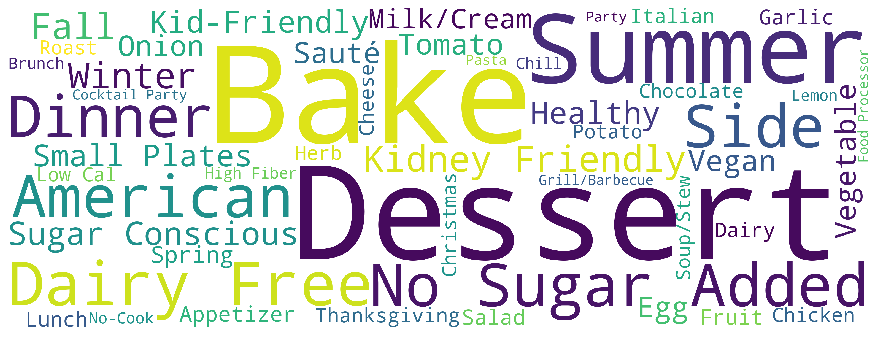

In [503]:


from PIL import Image
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 12), facecolor = None)
wc = WordCloud(background_color="white",width=4000,height=1500, max_words=50,relative_scaling=.25,normalize_plurals=False).generate_from_frequencies(dict(dictionary[11:]))
plt.imshow(wc)
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 


In [509]:
wine_mask = np.array(Image.open("cupcake-512.png"))
wine_mask


array([[[ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        ...,
        [ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        [ 0,  0,  0,  0]],

       [[ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        ...,
        [68, 68, 64,  1],
        [68, 68, 64,  1],
        [ 0,  0,  0,  0]],

       [[ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        ...,
        [68, 68, 64,  1],
        [68, 68, 64,  1],
        [ 0,  0,  0,  0]],

       ...,

       [[ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        ...,
        [ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        [ 0,  0,  0,  0]],

       [[ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        ...,
        [ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        [ 0,  0,  0,  0]],

       [[ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        ...,
        [ 0,  0,  0,  0],
        [ 0,  0

In [524]:
dic = []
for i in dictionary[1:]:
    dic.append(i[0])
dic

with open('your_file.txt', 'w') as f:
    for item in dic:
        f.write("%s\n" % item)

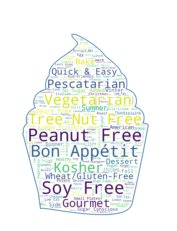

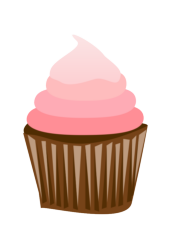

In [53]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud, STOPWORDS

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
text = open(path.join(d, '1.txt')).read()

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
alice_mask = np.array(Image.open(path.join(d, "edf5b530678d8fcedc9553355b8df90c.png")))

stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="white", width=1500,height=1500,max_words=2000, mask=alice_mask,
               stopwords=stopwords, contour_width=3, contour_color='steelblue')

# generate word cloud
wc.generate_from_frequencies(dict(dictionary[1:]))

# store to file
wc.to_file(path.join(d, "alice3.png"))

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()


In [14]:
rn = recipe_table[['Calories', 'Carbohydrates', 'Cholesterol', 'Fat', 'Fiber', 'Make_Again', 'Monounsaturated Fat',
       'Polyunsaturated Fat', 'Protein', 'Rating', 'Reviews', 'Saturated Fat',
       'Sodium', 'Title', '_id']]

# rna = recipe_american[['Calories', 'Carbohydrates', 'Cholesterol', 'Fat', 'Fiber', 'Make_Again', 'Monounsaturated Fat',
#        'Polyunsaturated Fat', 'Protein', 'Rating', 'Reviews', 'Saturated Fat',
#        'Sodium', 'Title', '_id']]

In [90]:
# rn.head(20)

In [15]:
rn['Make_Again#'] = rn['Make_Again'].apply(lambda x: x.strip('%'))
# rna['Make_Again#'] = rna['Make_Again'].apply(lambda x: x.strip('%'))

/Users/esotewic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
def get_val(x):
    return str(x).split(' ')[0]
def get_perc(x):
    return str(x.split(' ')[1])[2:-2]
def get_sod_perc(x):
    return str(x.split(' ')[1])[3:-2]

In [17]:
colz = ['Carbohydrates', 'Cholesterol', 'Fat', 'Fiber', 'Protein', 'Saturated Fat']
valcolz = [x[:3] + '_val' for x in colz]
percolz = [x[:3] + '_perc' for x in colz]

sod_colz = ['Sodium']
sodvalcolz = [x[:3] + '_val' for x in sod_colz]
sodpercolz = [x[:3] + '_perc' for x in sod_colz]


In [18]:
#rn['Fat_val'] = rn.apply(get_val,axis=1)
for i,x in enumerate(colz):
    rn[valcolz[i]] = rn[x].dropna().apply(get_val)
    rn[percolz[i]] = rn[x].dropna().apply(get_perc)
    
# for i,x in enumerate(colz):
#     rna[valcolz[i]] = rna[x].dropna().apply(get_val)
#     rna[percolz[i]] = rna[x].dropna().apply(get_perc)
    
for i,x in enumerate(sod_colz):
    rn[sodvalcolz[i]] = rn[x].dropna().apply(get_val)
    rn[sodpercolz[i]] = rn[x].dropna().apply(get_sod_perc)

/Users/esotewic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/esotewic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/esotewic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [487]:
# for i,x in enumerate(percolz):
#     rn[x]=str(rn[percolz[i]])[1:]
rn[['Sodium','Fat','Fat_val','Fat_perc','Sod_val','Sod_perc','Title']]

,Sodium,Fat,Fat_val,Fat_perc,Sod_val,Sod_perc,Title
0,NaN,NaN,NaN,NaN,NaN,NaN,Turkey Meatloaf recipe
1,405 mg(17%),16 g(25%),16,25,405,17,Pan-Seared Tilapia with Chile Lime Butter recipe
2,451 mg(19%),86 g(133%),86,133,451,19,Beef Stroganoff recipe
3,NaN,NaN,NaN,NaN,NaN,NaN,Low-Fat Banana Bread recipe
4,655 mg(27%),30 g(47%),30,47,655,27,Shrimp Scampi Pasta recipe
5,240 mg(10%),7 g(10%),7,10,240,10,Aunt Holly's Banana Bread recipe
6,2373 mg(99%),157 g(241%),157,241,2373,99,Banana Bread with Chocolate Chips and Walnuts ...
7,668 mg(28%),63 g(97%),63,97,668,28,Chocolate Stout Cake recipe
8,535 mg(22%),13 g(19%),13,19,535,22,Scalloped Potatoes with Three Cheeses recipe
9,697 mg(29%),57 g(88%),57,88,697,29,"Beef Tenderloin with Roasted Shallots, Bacon a..."


In [19]:
rn.columns

Index(['Calories', 'Carbohydrates', 'Cholesterol', 'Fat', 'Fiber',
       'Make_Again', 'Monounsaturated Fat', 'Polyunsaturated Fat', 'Protein',
       'Rating', 'Reviews', 'Saturated Fat', 'Sodium', 'Title', '_id',
       'Make_Again#', 'Car_val', 'Car_perc', 'Cho_val', 'Cho_perc', 'Fat_val',
       'Fat_perc', 'Fib_val', 'Fib_perc', 'Pro_val', 'Pro_perc', 'Sat_val',
       'Sat_perc', 'Sod_val', 'Sod_perc'],
      dtype='object')

In [19]:
rn1 = rn[['Rating','Reviews','Calories','Make_Again#', 'Fat_val', 'Fib_val', 'Pro_val', 'Sat_val']].apply(pd.to_numeric)

# rna1 = rna[['Rating','Reviews','Calories','Make_Again#', 'Fat_val', 'Fib_val', 'Pro_val', 'Sat_val']].apply(pd.to_numeric)

In [339]:
rna_group = rna1.groupby('Calories').mean().reset_index()

In [21]:
rn_group = rn1.groupby('Calories').mean().reset_index()
# rn_calories.tail()

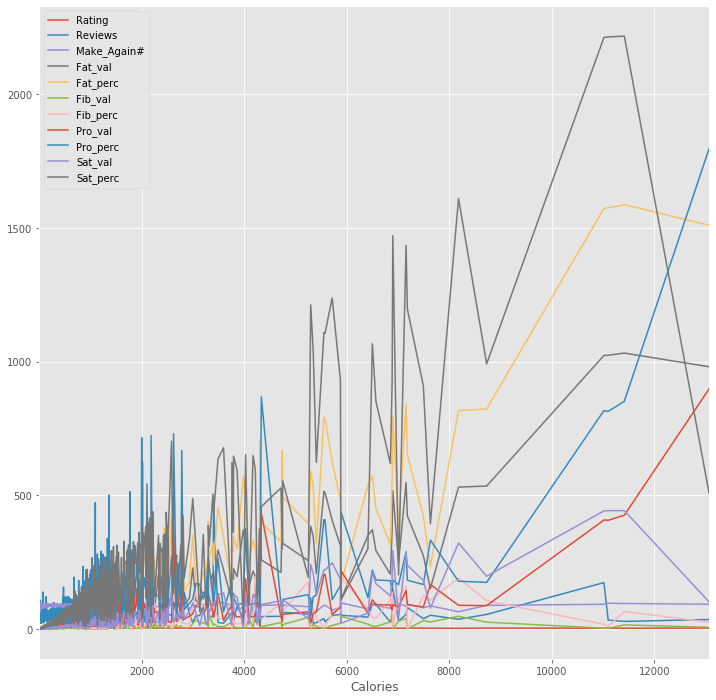

In [341]:
rn_group.plot('Calories', figsize = (12,12))

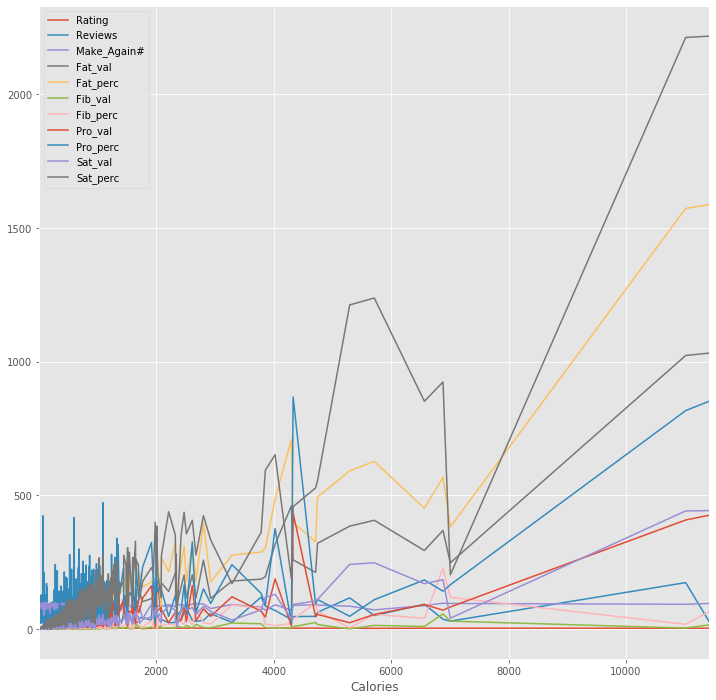

In [342]:
rna_group.plot('Calories', figsize = (12,12))

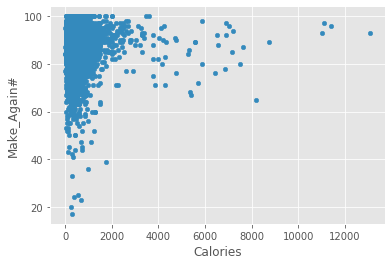

In [319]:
rn1.plot('Calories','Make_Again#',kind='scatter')

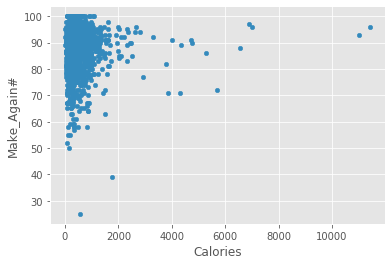

In [316]:
rna1.plot('Calories','Make_Again#',kind='scatter')

In [22]:
print(rn1.shape)
# print(rna1.shape)

(33102, 8)


In [23]:
rn['Fat_perc/100'] = pd.to_numeric(rn['Fat_perc'], errors = 'coerce')/100

/Users/esotewic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:

# rn['Score'] = rn1['score']
rn2 = rn1[['Calories', 'Fat_val', 'Fib_val', 'Pro_val','Make_Again#','Reviews']]


In [359]:
rna2 = rna1[['Calories', 'Fat_val', 'Fib_val', 'Pro_val','Make_Again#','Reviews']]
rna2['score'] = rna1['Rating'] * rna1['Reviews'] * rna1['Make_Again#']/100

/Users/esotewic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [360]:
rna2.describe()

,Calories,Fat_val,Fib_val,Pro_val,Make_Again#,Reviews,score
count,1845.000000,1845.000000,1836.000000,1845.000000,2176.000000,2176.000000,2176.000000
mean,514.130623,29.944715,3.525599,19.994580,88.256893,60.772978,188.280921
std,631.369699,47.612319,3.784077,28.628028,7.647143,53.172077,177.497414
min,13.000000,0.000000,0.000000,0.000000,25.000000,21.000000,21.000000
25%,248.000000,11.000000,1.000000,4.000000,85.000000,30.000000,87.342500
50%,388.000000,21.000000,3.000000,9.000000,90.000000,43.000000,129.420000
75%,606.000000,35.000000,4.250000,29.000000,93.000000,70.000000,217.087500
max,11414.000000,1032.000000,57.000000,434.000000,100.000000,508.000000,1778.480000


In [361]:
rn2.describe()

,Calories,Fat_val,Fib_val,Pro_val,Make_Again#,Reviews,score
count,7341.000000,7340.000000,7300.000000,7340.000000,9090.000000,9090.000000,9090.000000
mean,507.187849,29.044005,3.807397,21.205586,88.618702,55.042354,171.345083
std,583.669188,40.888682,4.127360,27.840084,7.901378,47.166045,158.359018
min,3.000000,0.000000,0.000000,0.000000,17.000000,21.000000,8.160000
25%,246.000000,12.000000,1.000000,5.000000,85.000000,28.000000,83.720000
50%,394.000000,21.000000,3.000000,12.000000,90.000000,39.000000,119.000000
75%,615.000000,35.000000,5.000000,31.000000,94.000000,63.000000,196.420000
max,13067.000000,1032.000000,57.000000,898.000000,100.000000,508.000000,1858.560000


In [24]:
rn1.columns

Index(['Rating', 'Reviews', 'Calories', 'Make_Again#', 'Fat_val', 'Fib_val',
       'Pro_val', 'Sat_val'],
      dtype='object')

In [25]:
rn['Fat_perc/100'].head()

0     NaN
1    0.25
2    1.33
3     NaN
4    0.47
Name: Fat_perc/100, dtype: float64

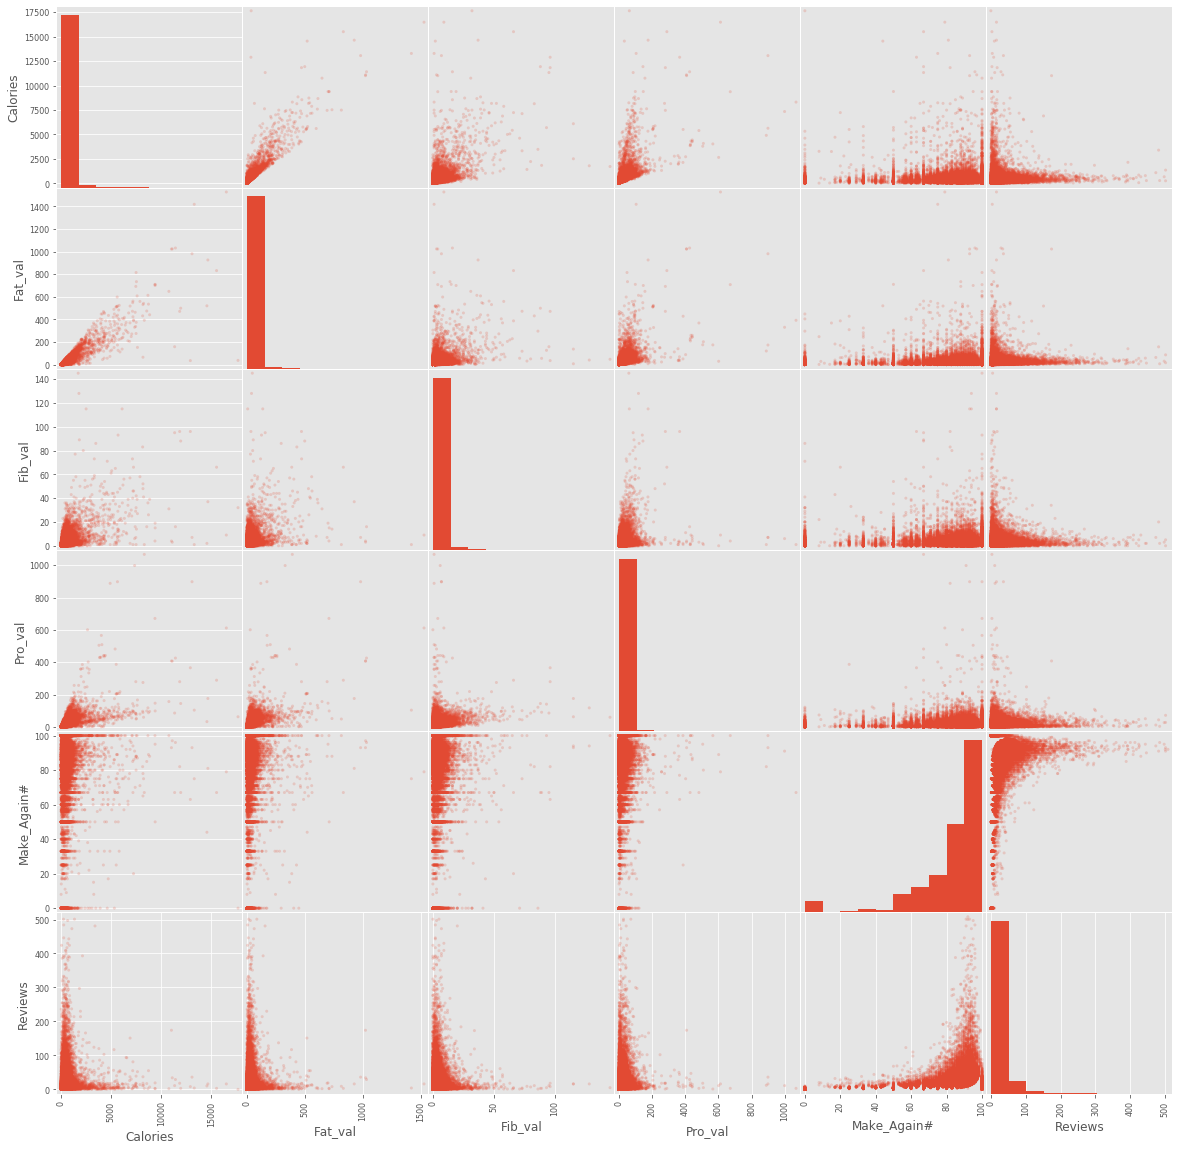

In [29]:
pd.plotting.scatter_matrix(rn2, alpha=0.2, figsize = (20,20));

In [7]:
import seaborn as sns

In [28]:
rn2.columns

Index(['Calories', 'Fat_val', 'Fib_val', 'Pro_val', 'Make_Again#', 'Reviews'], dtype='object')

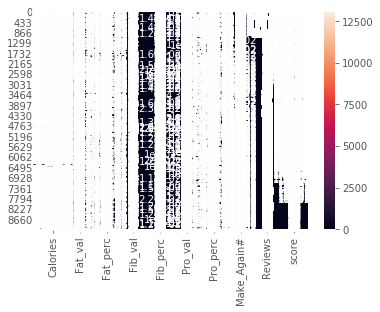

In [237]:
sns.heatmap(rn2, annot=True)

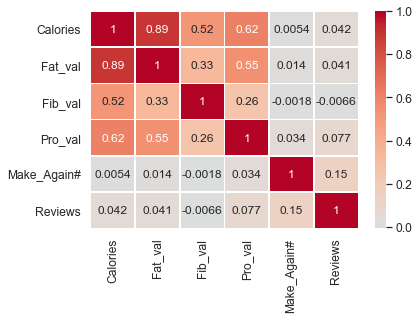

In [69]:
sns.heatmap(rn2.iloc[:,:].corr(),annot=True,annot_kws={"size": 12}, linewidths=.5,center=0,cmap="coolwarm")
sns.set(font_scale = 1.1)

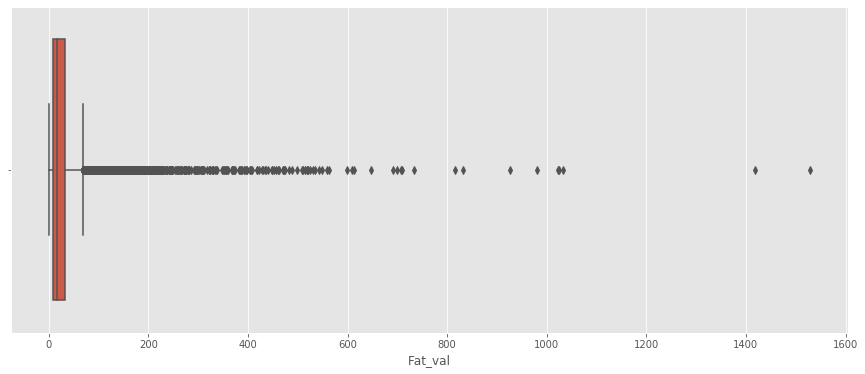

In [42]:
fig,ax=plt.subplots(figsize=(15,6))
sns.boxplot(x=rn2['Fat_val'])